# California electricity capacity analysis

By [Ryan Menezes](mailto:ryan.menezes@latimes.com) and [Ben Welsh](mailto:ben.welsh@latimes.com)

This data analysis provided information for the February 5, 2017, Los Angeles Times story ["Californians are paying billions for power they don't need"](http://www.latimes.com/projects/la-fi-electricity-capacity/) by documenting California's glut of power and the increasing cost to consumers. It also underpins a [complementary interactive graphic](http://www.latimes.com/projects/la-fi-electricity-capacity-graphic/). The data are drawn from the Energy Information Administration, a branch of the United States government.

In [1]:
import os
import calculate
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_dir = os.path.join(os.getcwd(), 'data', 'output')

## Download and extract source data

In [4]:
%%capture
%run ./extract/download.ipynb

## Transform and filter source data

In [5]:
%%capture
%run ./transform/capacity.ipynb
%run ./transform/customers.ipynb
%run ./transform/price.ipynb
%run ./transform/revenue.ipynb
%run ./transform/sales.ipynb
%run ./transform/plants.ipynb

## Analyze the data

### How much power are Californians using each year?

The amount of power sold each year in the state can give the answer.

In [6]:
ca_sales_df = pd.read_csv(os.path.join(data_dir, 'annual-sales-california.csv'), index_col="Year")

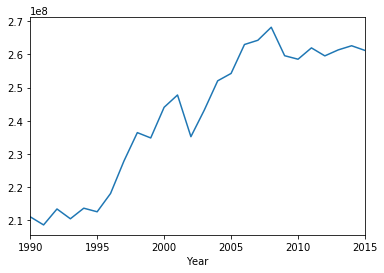

In [7]:
ca_sales_df['Total'].plot(legend=False)

How has usage changed since it peaked in 2008?

In [8]:
calculate.percentage_change(ca_sales_df.get_value(2008, 'Total'), ca_sales_df.get_value(2015, 'Total'))

-2.6047533313159197

### How much energy capacity does the state have, and how has it changed over time?

In [9]:
ca_cap_df = pd.read_csv(os.path.join(data_dir, 'annual-capacity-california.csv'), index_col="Year")

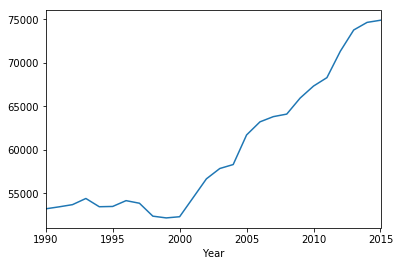

In [10]:
ca_cap_df['Summer Capacity (Megawatts)'].plot(legend=False)

How has that changed since usage peaked in 2008?

In [11]:
ca_new_capacity = ca_cap_df.get_value(2015, 'Summer Capacity (Megawatts)') - ca_cap_df.get_value(2008, 'Summer Capacity (Megawatts)')

In [12]:
ca_new_capacity

10786.800000000003

In [13]:
ca_new_capacity / ca_cap_df.get_value(2008, 'Summer Capacity (Megawatts)')

0.16826768582793858

How many homes could that new capacity power?

According to [California Independent System Operator](http://www.energy.ca.gov/glossary/ISO_GLOSSARY.PDF), 1 megawatt can power roughly 750 homes

In [14]:
ca_new_homes = ca_new_capacity * float(750)

In [15]:
ca_new_homes

8090100.0000000019

Los Angeles city was estimated to contain 1,342,761 households in 2015 by the [American Community Survey](https://www.census.gov/quickfacts/table/PST045215/0644000)

In [16]:
ca_new_homes / 1342761

6.024973915685667

### With supply up and demand down, how have California's prices changed?

In [17]:
price_df = pd.read_csv(os.path.join(data_dir, 'annual-price-california-vs-usa.csv'), index_col="Year")

In [18]:
ca_price_df = price_df[price_df['State'] == 'CA']

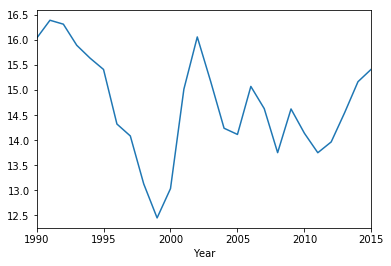

In [19]:
ca_price_df["Total (2015 dollars)"].plot()

In [20]:
ca_price_df.get_value(2008, "Total (2015 dollars)")

13.751800198800002

In [21]:
ca_price_df.get_value(2015, "Total (2015 dollars)")

15.42

In [22]:
calculate.percentage_change(
    ca_price_df.get_value(2008, "Total (2015 dollars)"),
    ca_price_df.get_value(2015, "Total (2015 dollars)")
)

12.1307739865619

### How does California's increase in price compare to the rest of the country?

In [23]:
us_price_df = price_df[price_df['State'] == 'US']

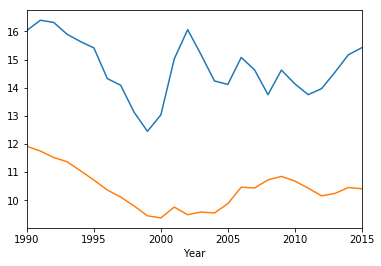

In [24]:
ca_price_df["Total (2015 dollars)"].plot()
us_price_df["Total (2015 dollars)"].plot()

In [25]:
us_price_df.get_value(2008, "Total (2015 dollars)")

10.7239819005

In [26]:
us_price_df.get_value(2015, "Total (2015 dollars)")

10.41

In [27]:
calculate.percentage_change(
    us_price_df.get_value(2008, "Total (2015 dollars)"),
    us_price_df.get_value(2015, "Total (2015 dollars)")
)

-2.9278481016958886

How much has that gap grown since California's demand stopped growing?

In [28]:
ca_price_df.get_value(2008, "Total (2015 dollars)") / us_price_df.get_value(2008, "Total (2015 dollars)")

1.2823408624140658

In [29]:
ca_price_df.get_value(2015, "Total (2015 dollars)") / us_price_df.get_value(2015, "Total (2015 dollars)")

1.4812680115273775

### What proportion of power is used by businesses, as opposed to residents?

In [30]:
ca_sales_df['Business (%)'] = ca_sales_df['Business'] / ca_sales_df['Total']

In [31]:
ca_sales_df['Business (%)']

Year
1990    0.684619
1991    0.683602
1992    0.680853
1993    0.680006
1994    0.677719
1995    0.676475
1996    0.672664
1997    0.679278
1998    0.681918
1999    0.679330
2000    0.675319
2001    0.690555
2002    0.671778
2003    0.659052
2004    0.669235
2005    0.663282
2006    0.658365
2007    0.662579
2008    0.659784
2009    0.654066
2010    0.662489
2011    0.662526
2012    0.652806
2013    0.658512
2014    0.659688
2015    0.657747
Name: Business (%), dtype: float64

### How much has the total revenue from electricity changed?

In [32]:
ca_revenue_df = pd.read_csv(os.path.join(data_dir, "annual-revenue-california.csv"), index_col="Year").sort_index()

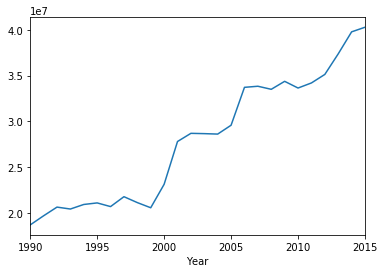

In [33]:
ca_revenue_df['Total'].plot()

In [34]:
ca_revenue_df.get_value(2008, 'Total')

33496752

In [35]:
ca_revenue_df.get_value(2015, 'Total')

40284581

In [36]:
ca_revenue_df.get_value(2015, 'Total') - ca_revenue_df.get_value(2008, 'Total')

6787829

### How much does that add up to per residential customer after adjusting for inflation?

In [37]:
ca_customer_df = pd.read_csv(os.path.join(data_dir, "annual-customers-california.csv"), index_col="Year")

In [38]:
ca_revenuecustomers_df = pd.concat(
    [ca_revenue_df.add_suffix("_revenue"), ca_customer_df.add_suffix("_customers")],
    axis=1
)

In [39]:
ca_revenuecustomers_df['Residential revenue per customer (2015 dollars)'] = (
    ca_revenuecustomers_df['Residential (2015 dollars)_revenue'] / ca_revenuecustomers_df['Residential_customers']
)

In [40]:
(
    ca_revenuecustomers_df.get_value(2015, 'Residential revenue per customer (2015 dollars)')  -
    ca_revenuecustomers_df.get_value(2008, 'Residential revenue per customer (2015 dollars)')
)*1000

63.551830412633237

### How many plants are online now? How does that compare to before the building boom that followed the blackouts of 2001?

In [41]:
plants_by_year_df = pd.read_csv(os.path.join(data_dir, "plants-california.csv"), index_col=["plant_id", "year"]).sort_index()

In [42]:
plants_2001_df = plants_by_year_df.loc[pd.IndexSlice[:, [2001.0]],]

In [43]:
plants_2015_df = plants_by_year_df.loc[pd.IndexSlice[:, [2015.0]],]

In [44]:
len(plants_2001_df)

694

In [45]:
len(plants_2015_df)

1200

### How many of today's plants generate less than 33% of their total capacity?

In [46]:
len(plants_2015_df[plants_2015_df.capacity_utilization < .33])

831

In [47]:
len(plants_2015_df[plants_2015_df.capacity_utilization < .33]) / float(len(plants_2015_df))

0.6925

### How many plants built after usage peaked in 2008 generate less than 50% of their total capacity?

In [48]:
new_plants_df = plants_2015_df[plants_2015_df.minimum_year > 2008]

In [49]:
len((new_plants_df.capacity_utilization < .50))

493

In [50]:
(new_plants_df.capacity_utilization < .50).sum() / float(len(new_plants_df))

0.87018255578093306

### How many homes could Sutter Energy Center power if it was still running?

In [51]:
sutter = plants_by_year_df.loc[([55112.0]),]

In [52]:
sutter_2015 = plants_by_year_df.loc[([55112.0], [2015.0]),]

In [53]:
sutter_capacity = sutter_2015.summer_mw.values[0]

As cited above, California regulators say 1 megawatt can power roughly 750 homes

In [54]:
sutter_capacity * 750

397500.0

### How much of its potential power did Sutter generate over time?

<Container object of 15 artists>

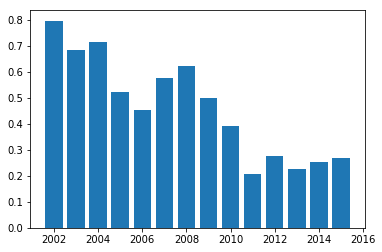

In [55]:
plt.bar(range(2001, 2016), sutter.capacity_utilization)

### What was the average at Sutter's before Colusa Generating Station opened nearby in 2010? 

In [56]:
early_sutter = sutter.loc[pd.IndexSlice[[55112.0], :2010.0],]

In [57]:
early_sutter.net_generation_mwh.sum() / early_sutter.capacity_mwh.sum()

0.52619660549668301

### What about after?

In [58]:
late_sutter = sutter.loc[pd.IndexSlice[[55112.0], 2011.0:],]

In [59]:
late_sutter.net_generation_mwh.sum() / late_sutter.capacity_mwh.sum()

0.24580834841044197